
# Project: Investigate a Dataset - [TMDB Movies Exploratory]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

These dataset contain data for 10,000 Movie collected From Movie Database (TMDb),consist of 21 columns and 10866 Rows.The dataset used for this project is sourced from Kaggle.

### Question(s) for Analysis
In this analysis, the following 6 research questions will be explored:

1.Which year Has the highest Profit Rate ?

2.Which Movie got the highest Ratings ?

3.What are the movies with the highest and the lowest revenues ?

4.Do movies with higher budgets receive higher ratings?

5.Movie with highest and lowest budget?

6.Which year has the highest and lowest release of movies ?



In [641]:
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

### General Properties
After reviewing the dataset and analyzing the questions associated with it, then we will do some Operations to prepare the data for futher exploration and analysis.

In [642]:

df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [643]:
df.shape



(10866, 21)

In [644]:

df.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [645]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [646]:
print(df.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [647]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
These following operations were performed to enhance the dataset,ensuring its 
cleanliness and suitability for analysis:

1.Drop the columns that are not essential for the analysis.

2.remove the duplicate rows from the dataset.

3.Handle with missing values.

4.convert data types for release_data,budget and revenue.
 

### 1.Drop the columns that are not essential for the analysis.


drop the columns which are not usable in the data analysis proocess such as homepage,tagline,imdb_id,budget_adj,revenue_adj,and overview.


In [648]:
columnsdrop = ['imdb_id', 'budget_adj', 'homepage', 'tagline', 'revenue_adj', 'overview']
df = df.drop(columns=columnsdrop)
num_col_afterdrop = df.shape[1]
print("after the drop the columns that not usable the shape=",num_col_afterdrop)


after the drop the columns that not usable the shape= 15


### 2.remove the duplicate rows from the dataset.

removed duplicate rows from the dataset before proceeding with further analysis.

In [649]:
df.drop_duplicates(inplace=True)
num_row_remove = df.shape[0]
print('after removing duplicates value the number of rows is=',num_row_remove)

after removing duplicates value the number of rows is= 10865


### 3.Handle with missing values.

Check for missing values, then handle them accordingly, such as replacing missing values in numerical columns with the mean.

In [650]:
#check for missing values for all columns
missvalue=df.isnull().sum()
print(missvalue)

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64


In [651]:
#handle missing value with cast,director,genres,keywords,and production companiesby replacing them with 'unknown'.
categorical_col=['cast','director','genres','production_companies','keywords']
for col in categorical_col:
    df[col].fillna('Unknown', inplace=True)
    
missvalue=df.isnull().sum()
print("after handle with missing value:\n",missvalue)

after handle with missing value:
 id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64


### 4.convert data types for release_data , and revenue

To ensure consistency in our analysis, we need to convert the data types for the 'release_date' and 'revenue' columns as follows: 

    1.release date: convert to datetime format,to allow perform 
    data-based operations.
    
    2.revenue: convert to numeric format, to enable us to do mathematical operations.

In [652]:

df['release_date'] = pd.to_datetime(df['release_date'])
df['revenue'] = pd.to_numeric(df['revenue'])
df.dtypes


id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
In the EDA section, we'll dive into the data to uncover patterns and insights. By crunching numbers and making charts, we'll answer our research questions.

### Research Question 1 (Which year Has the highest Profit Rate ?)

In [653]:
# calculate profit for each movie
df['profit'] = df['revenue'] - df['budget']
# group data by release year and sum up profits for each year
profit_by_year = df.groupby('release_year')['profit'].sum()
#find year with highest profit
highest_profit_year = profit_by_year.idxmax()

print("year with the highest profit rate :",highest_profit_year)

year with the highest profit rate : 2015


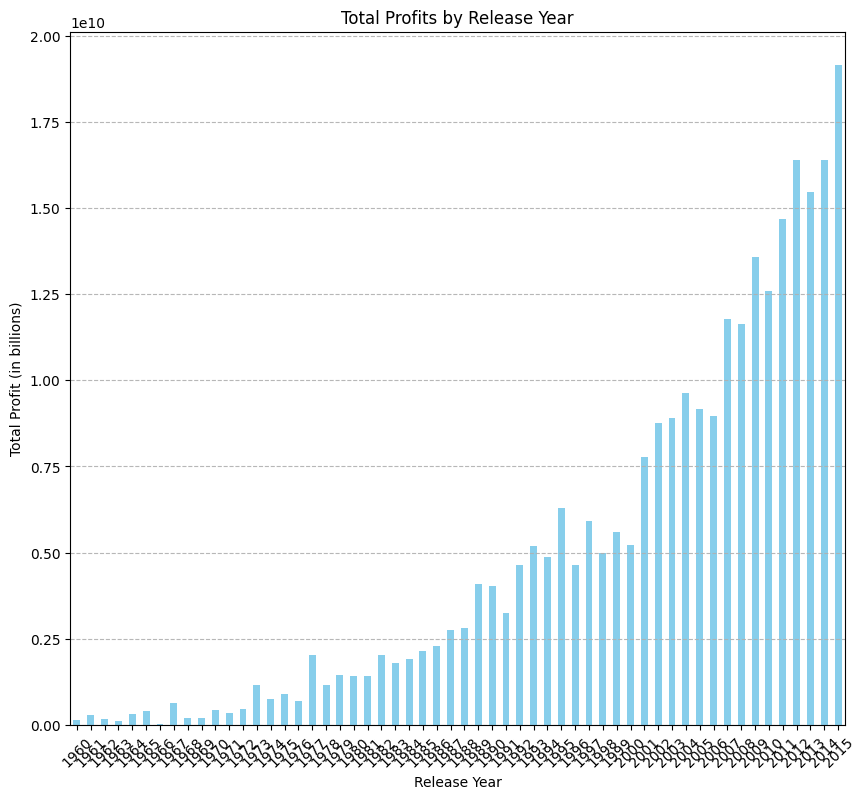

In [654]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 9))
profit_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Profits by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Profit (in billions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()


### Research Question 2  (Which Movie got the highest Ratings ?)

In [655]:
# Find the movie with the highest rating
highest_rated_movie = df.loc[df['vote_average'].idxmax()]

# Create a DataFrame for the highest rated movie
highest_rated_movie_df = pd.DataFrame({
    'Title': [highest_rated_movie['original_title']],
    'Rating': [highest_rated_movie['vote_average']]
})

# Display the table
highest_rated_movie_df


,Title,Rating
0,The Story of Film: An Odyssey,9.2


### Research Question 3 (What are the movies with the highest and the lowest revenues ?)

In [656]:
def find_minmax(x):
    min_index = df[x].idxmin()
    max_index = df[x].idxmax()
    
    # Create DataFrames for the movies with highest and lowest revenue
    highest_revenue_movie = pd.DataFrame(df.loc[max_index, :])
    lowest_revenue_movie = pd.DataFrame(df.loc[min_index, :])
    
    # Print the movies with high and low revenue
    print("Movie with the Highest " + x + ":", df['original_title'][max_index])
    print("Movie with the Lowest " + x + ":", df['original_title'][min_index])
    
    revenue_movies_df = pd.concat([highest_revenue_movie, lowest_revenue_movie], axis=1)
    return revenue_movies_df

find_minmax('revenue')


Movie with the Highest revenue: Avatar
Movie with the Lowest revenue: Wild Card


,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


### Research Question 4 (Do movies with higher budgets receive higher ratings?)

In [657]:
# Calculate the correlation coefficient between budget and ratings
correlation = df['budget'].corr(df['vote_average'])

# Print the correlation coefficient
print("Correlation coefficient between budget and ratings:", correlation)


Correlation coefficient between budget and ratings: 0.08106672575599058


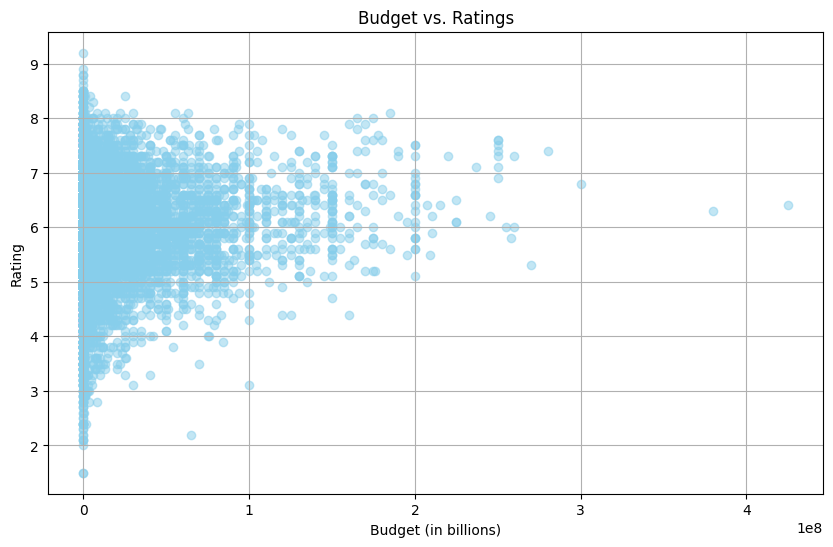

In [658]:
import matplotlib.pyplot as plt

# Plotting budget vs. ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['vote_average'], color='skyblue', alpha=0.5)
plt.title('Budget vs. Ratings')
plt.xlabel('Budget (in billions)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


### Research Question 5 (Movie with highest and lowest budget?)

In [659]:
find_minmax('budget')

Movie with the Highest budget: The Warrior's Way
Movie with the Lowest budget: Mr. Holmes


,2244,30
id,46528,280996
popularity,0.25054,3.927333
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
keywords,assassin|small town|revenge|deception|super speed,london|detective|sherlock holmes
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama


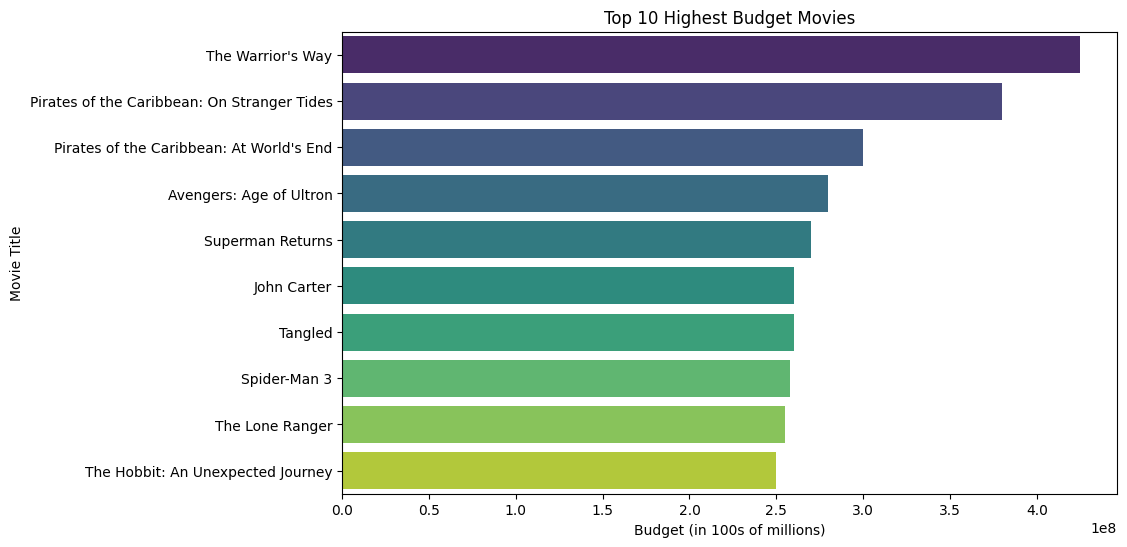

In [660]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the 'budget' column in descending order and store it in a new dataframe
info = pd.DataFrame(df['budget'].sort_values(ascending=False))
info['original_title'] = df['original_title']

# Extract the top 10 budget movies data from the dataframe
top_10_budget_movies = info.head(10)

# Plot the figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='budget', y='original_title', data=top_10_budget_movies, palette='viridis')
ax.set_title("Top 10 Highest Budget Movies")
ax.set_xlabel("Budget (in 100s of millions)")
ax.set_ylabel("Movie Title")
plt.show()


### Research Question 6 (Which year has the highest and lowest release of movies ?)

In [661]:
# Count the number of movie releases for each year
movie_counts_by_year = df['release_year'].value_counts()

# Display the number of movie releases for each year
print("Number of movie releases by year:")
print(movie_counts_by_year)


Number of movie releases by year:
2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: release_year, dtype: int64


In [662]:
# Find the year with the highest number of movie releases
year_highest_release = movie_counts_by_year.idxmax()
highest_release_count = movie_counts_by_year.max()

# Find the year with the lowest number of movie releases
year_lowest_release = movie_counts_by_year.idxmin()
lowest_release_count = movie_counts_by_year.min()

# Display the year with the highest and lowest number of movie releases
print("\nYear with the highest number of movie releases:", year_highest_release)
print("Number of movie releases in the highest year:", highest_release_count)
print("\nYear with the lowest number of movie releases:", year_lowest_release)
print("Number of movie releases in the lowest year:", lowest_release_count)



Year with the highest number of movie releases: 2014
Number of movie releases in the highest year: 700

Year with the lowest number of movie releases: 1961
Number of movie releases in the lowest year: 31


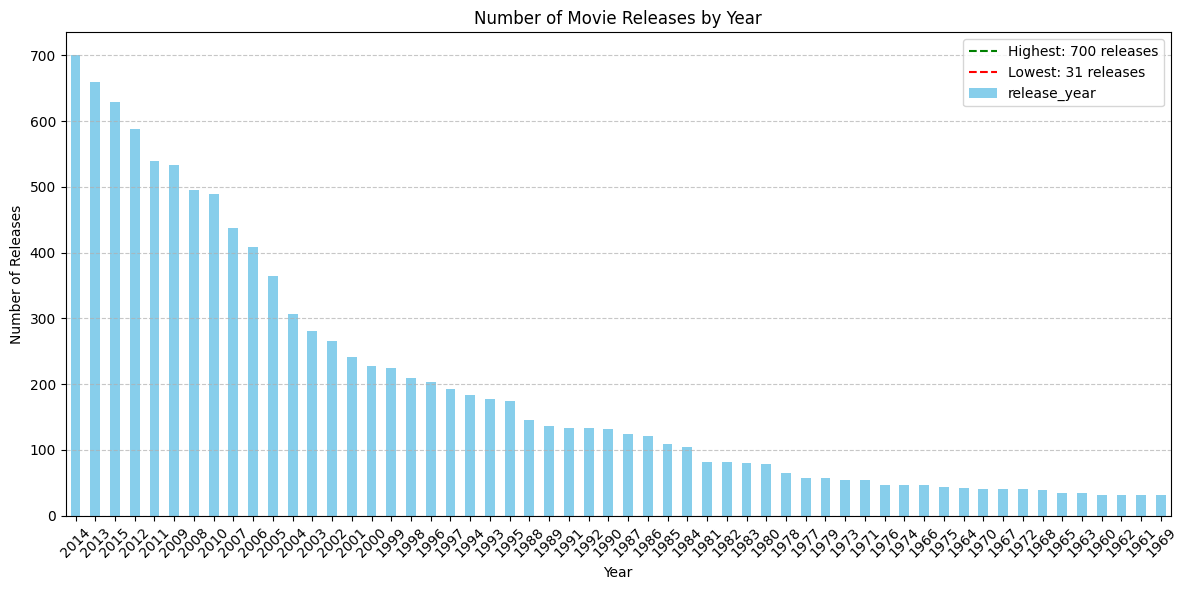

In [663]:
import matplotlib.pyplot as plt

# Plot the number of movie releases by year
plt.figure(figsize=(12, 6))
movie_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movie Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Highlight the years with the highest and lowest number of releases
plt.axvline(x=year_highest_release, color='green', linestyle='--', label=f'Highest: {highest_release_count} releases')
plt.axvline(x=year_lowest_release, color='red', linestyle='--', label=f'Lowest: {lowest_release_count} releases')
plt.legend()

plt.show()



# <a id='conclusions'></a>
## Conclusions

- **Highest Profit Year:** The analysis revealed that the year 2015 had the highest profit rate in the dataset.
- **Highest Rated Movie:** The movie titled "The Story of Film: An Odyssey" obtained the highest rating of 9.2.
- **Highest and Lowest Revenues:** The movie "Avatar" had the highest revenue, while "Wild Card" had the lowest revenue.
- **Budget vs. Ratings:** There was a weak positive correlation (correlation coefficient ≈ 0.08) between movie budgets and ratings.
- **Highest and Lowest Budget Movies:** "The Warrior's Way" had the highest budget, while "Mr. Holmes" had the lowest budget.
- **Release Trends:** The year 2014 saw the highest number of movie releases, while 1961 had the lowest.
### Limitations

- **Data Quality:** The analysis relies on the quality of the data provided. Incomplete or inaccurate data could lead to biased conclusions.

- **Generalization:** The findings are based on the dataset and may not be applicable to all movie industries or time periods. Regional and temporal variations could influence the results.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [665]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 639337 bytes to Investigate_a_Dataset.html
